In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

#### 1. Вычислить функцию: $ \frac{1}{2}\sum_{i=1}^{n}\cos^2(x_i), \vec{x}\in \mathbb{R}^{n} $

In [2]:
uno = lambda x_vec: (np.cos(x_vec) ** 2).sum() * 0.5

uno(np.array([10, 20, 30 ,40]))

0.6695859439767315

#### 2. Вычислить функцию: $ f(\vec{x},\vec{w},b)=\vec{w}\cdot\vec{x}+b=\sum_{i=1}^{n}\vec{w_i}\vec{x_i}+b $

In [3]:
def dos(x_vec, w_vec, b):
    return x_vec.dot(w_vec) + b

dos(np.array([1, 2, 3, 4]), np.array([1, 2, 3, 4]), 5)

35

#### 3. Вычислить функцию: $ Loss(\vec{y},\vec{t})=\sum_{i=1}^{m}\left\{y_i-t_i\right\}^2,\; \;  \vec{t},\vec{y}\in \mathbb{R}^m$

In [4]:
def loss(y_vec,t_vec):
    return ((y_vec - t_vec) ** 2).sum()

loss(np.array([5, 5, 5, 5]), np.array([2, 2, 2, 2]))

36

#### 4. Минимизируйте функцию Loss
Минимизируйте функцию $Loss$ из задания 3 относительно $\vec{w}$ и b, для набора данных $\left(\mathbf{X},\vec{y}\right)$, записанного в формате csv. $$\underset{\vec{w}, b}{arg \; min} \; Loss(\vec{y}, \vec{t}), \;\;\;\; t_i=\vec{w}\cdot X_i+b$$

In [5]:
file_path = "dataset_4.csv"

dataset = np.genfromtxt(file_path, delimiter=",")
x_mat = dataset[:, :2]
y_vec = dataset[:, 2]

size = len(y_vec)

def loss_wrapper(arg):
    w_vec, b = arg[:2], arg[2]
    return sum(loss(y_vec[i], w_vec.dot(x_mat[i]) + b) for i in range(size))

x0 = [50, 50, 50]
res = minimize(loss_wrapper, x0)
res.x

array([1.01451625, 2.06848513, 3.67928908])

#### 5. Построить график: $f(x) = \frac{1}{x},\; x\in [0.1,10]$

<IPython.core.display.Javascript object>


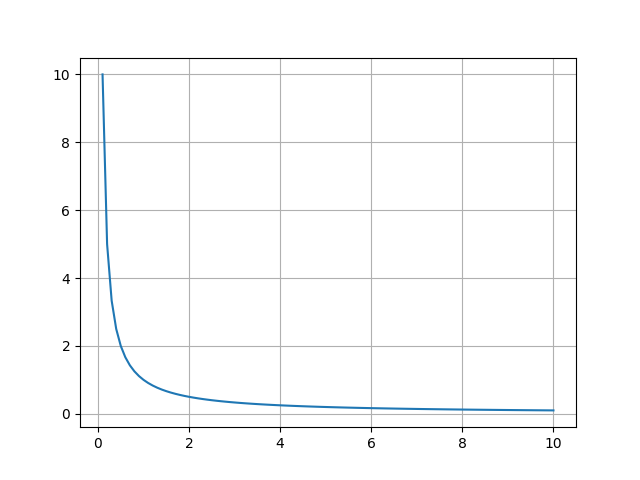

In [6]:
tres = lambda x: 1 / x
x_coords = np.linspace(0.1, 10, 100)

fig, ax = plt.subplots()
ax.plot(x_coords, tres(x_coords))
ax.grid(True)

#### 6. Построить график: $f(x) = \int_{1}^{x}\frac{1}{x}{\mathrm{d} x} \approx h\sum_{i=1}^{N}1/x_i, \; 1\leqslant x_i\leqslant x, \; x_i =1+ih, \;h=\frac{x-1}{h}$

<IPython.core.display.Javascript object>


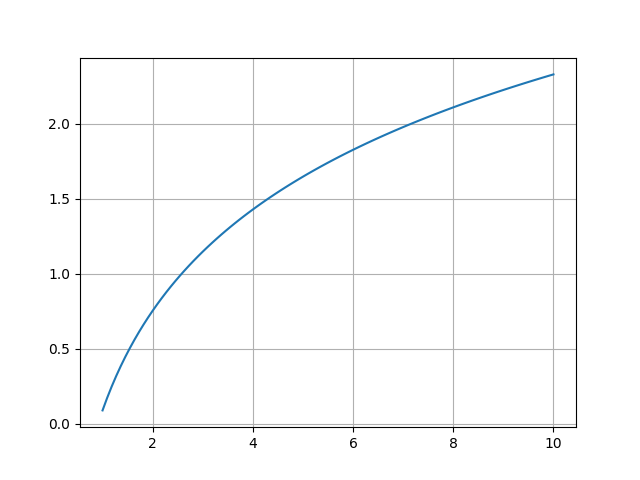

In [7]:
N = 100
a = 1
b = 10
h = (b - a) / N
x_coords = np.linspace(a, b, N)
y_coords = h * np.cumsum(1 / x_coords)

fig, ax = plt.subplots()
ax.plot(x_coords, y_coords)
ax.grid(True)

#### 7. Построить график с гауссовским шумом
Сгенерируйте N точек (x,y) используя функцию $t = f(x)$ и наложив на значения $t_i$ гауссовский шум с заданным среднеквадратичным отклонением $\sigma $. Отобразите сгенерированные точки и график $f(x)$ на плоскости.

<IPython.core.display.Javascript object>


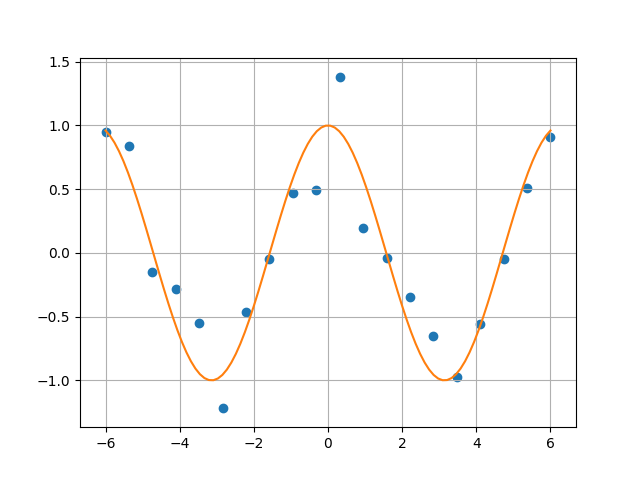

In [8]:
cinco = lambda x: np.cos(x)
mean = 0
sigma = 0.2

x_coords = np.linspace(-6, 6, 100)
y_coords = cinco(x_coords)

dots_count = 20
x_coords_dots = np.linspace(-6, 6, dots_count) 
y_coords_dots = cinco(x_coords_dots) + [np.random.normal(mean, sigma) for i in range(dots_count)]

fig, ax = plt.subplots()
ax.plot(x_coords, y_coords, color="C1")
ax.scatter(x_coords_dots, y_coords_dots)
ax.grid(True)

#### 8. Обучения модели классификации
Задана матрица примеров $X$ и вектор соотв. классов $\vec{y}$, являющиеся входными данными для обучения модели классификации. Отобрать и перемешать примеры с соответствующими им классами таким образом, чтобы для каждой уникальной метки осталось одинаковое число примеров. 

In [9]:
file_path = "dataset_8.csv"

dataset = np.genfromtxt(file_path, delimiter=",")
x_mat = dataset[:, :2]
y_vec = dataset[:, 2]

uniques, counts = np.unique(y_vec, return_counts=True)
count = min(counts)

res_dataset = np.concatenate([dataset[np.where(y_vec == unique)][:count] for unique in uniques])
np.random.shuffle(res_dataset)

print(res_dataset[:, :2])
print("-" * 20)
print(res_dataset[:, 2])

[[ 6.   1. ]
 [-2.   1. ]
 [ 1.   2. ]
 [-4.   0. ]
 [-2.  -4. ]
 [ 2.   0.5]]
--------------------
[0. 0. 1. 2. 2. 1.]


#### 9. Сигнал с шумом и две его фильтрованные версии
Сгенерируйте и отобразите на плоскости сигнал $y_i = f(x_i)$ с шумом (например, как в задании 7), а также две его фильтрованные версии:
1. $a(x_i) = \frac{1}{3}\left ( y_{i-1} + y_i + y_{i+1} \right )$ - скользящее среднее (зелёный цвет)
2. $m(x_i)=median(y_{i-1},y_i,y_{i+1})$ - скользящая медиана (синий)

<IPython.core.display.Javascript object>


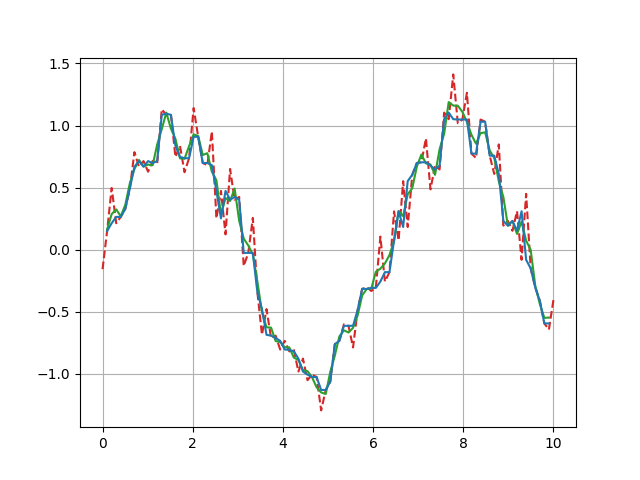

In [10]:
seis = lambda x: np.sin(x)
mean = 0
sigma = 0.2

a = 0
b = 10
count = 100
x_coords = np.linspace(a, b, count) 
y_signal = seis(x_coords) + [np.random.normal(mean, sigma) for i in range(count)]

x_coords_slice = x_coords[1:-1]

y_average = np.array([])
for i in range(1, count - 1):
    y_average = np.append(y_average, np.mean([y_signal[i - 1], y_signal[i], y_signal[i + 1]]))
    
y_median = np.array([])
for i in range(1, count - 1):
    y_median = np.append(y_median, np.median([y_signal[i - 1], y_signal[i], y_signal[i + 1]]))

fig, ax = plt.subplots()
ax.plot(x_coords, y_signal, color="C3", linestyle='dashed')
ax.plot(x_coords_slice, y_average, color="C2")
ax.plot(x_coords_slice, y_median, color="C0")
ax.grid(True)

#### 10. Сгенерировать экзаменационные билеты
Сгенерировать $N$ экзаменационных билетов по два вопроса из $2N$ вопросов так, чтобы каждый вопрос встречался не более одного раза и, для каждого вопроса был равновероятен любой другой вопрос в билете.

In [11]:
N = 10
questions = np.random.permutation(N * 2)
np.reshape(questions, (N, 2))

array([[ 6,  4],
       [ 8,  9],
       [11, 16],
       [ 2, 18],
       [ 7,  0],
       [12, 15],
       [19, 17],
       [ 1, 14],
       [ 5, 13],
       [10,  3]])

#### 11. Построить график (полярные координаты)
Построить график функции $r(\phi )=a\cos(k\phi+\gamma_0)$ заданной в полярных координатах, воспользовавшись формулами преобразования координат:
$$ x=r\cos(\phi), y=r\sin(\phi) $$

<IPython.core.display.Javascript object>


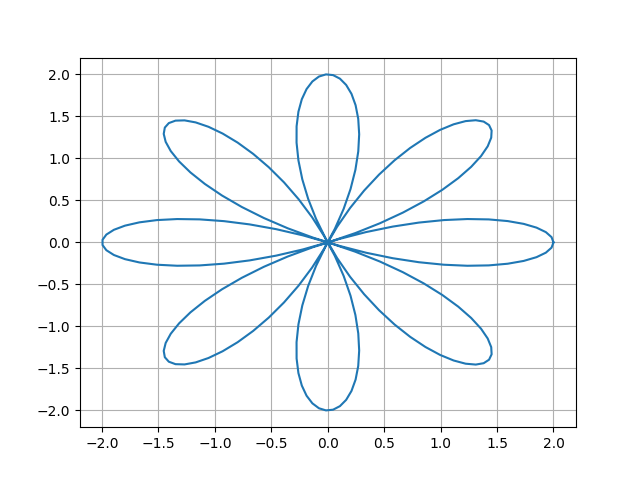

In [12]:
a = 2
k = 4
gamma = 0

gen_x = lambda x: a * np.cos(k * x + gamma) * np.cos(x)
gen_y = lambda y: a * np.cos(k * y + gamma) * np.sin(y)

values = np.linspace(0, 2 * np.pi, 200)

fig, ax = plt.subplots()
ax.plot(gen_x(values), gen_y(values))
ax.grid(True)

#### 12. Аффинное преобразование
Построить на плоскости окружность и любую другую кривую. Применить к их точкам аффинное преобразование, заданное матрицей(линейным преобразованием) $M$ и вектором трансляции $\vec{b}$.

<IPython.core.display.Javascript object>


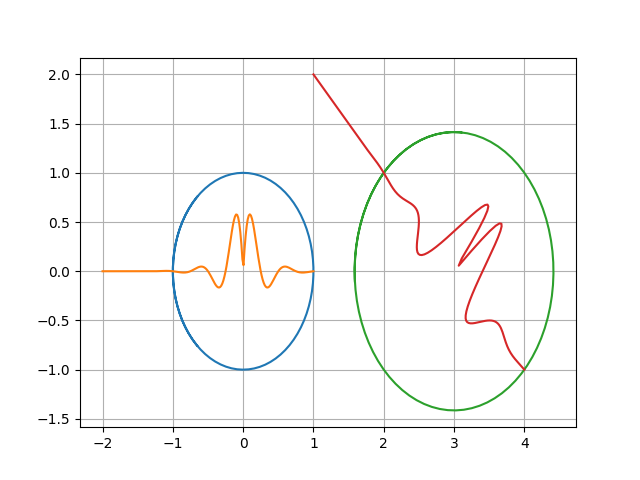

In [13]:
m = np.array([[ 1, 1],
              [-1, 1]])

b = np.array([3, 0])

def affine(old_x, old_y):
    lst = zip(old_x, old_y)
    x = []
    y = []
    
    for coord in lst:
        t = m @ np.array(coord) + b
        x.append(t[0])
        y.append(t[1])
        
    return x, y

values = np.linspace(-4, 4, 100)

x_circle = np.cos(values)
y_circle = np.sin(values)

x_line = np.linspace(-2, 1, 200)
y_line = np.sin(4 * np.pi * np.absolute(x_line)) * np.exp(-5 * np.absolute(x_line))

fig, ax = plt.subplots()
ax.plot(x_circle, y_circle)
ax.plot(x_line, y_line)
ax.plot(*affine(x_circle, y_circle))
ax.plot(*affine(x_line, y_line))
ax.grid(True)

#### 13. Гистограммы частот выборки
Сгенерировать выборку с эмпирическим распределением, похожим на нормальное. Отобразить гистограмму частот значений элементов выборки. Подсчитать выборочное среднее и выборочную дисперсию и, используя их, построить кривую нормального распределения, сопоставимую по масштабам с гистограммой.

<IPython.core.display.Javascript object>


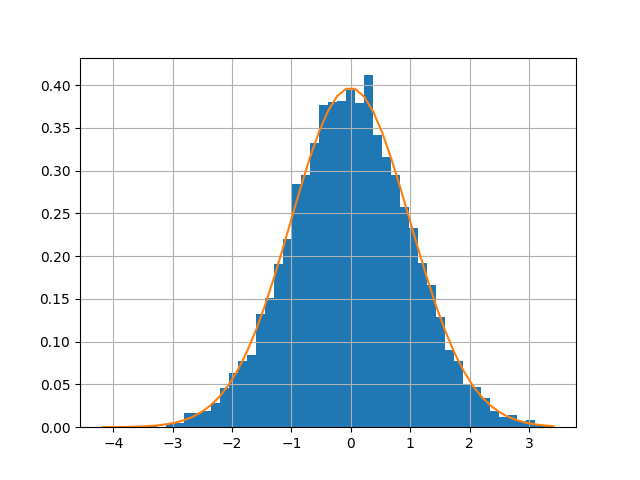

Mean: -0.006974210011067155
Sigma: 1.0053782834812883


In [14]:
x = np.random.randn(10000)

num_bins = 50

fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, num_bins, density=True)

mean = np.mean(x)
sigma = np.sqrt(np.var(x))

print("Mean:", mean)
print("Sigma:", sigma)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mean)) ** 2))

ax.plot(bins, y)
ax.grid(True)

#### 14. Трёхмерный график с точками 
Используя данные из задания 4, изобразите трёхмерный график с точками $(x_i,y_i,z_i)$ в пространстве и полученной при помощи оптимизации плоскости $z = w_1x + w_2y + b$

<IPython.core.display.Javascript object>


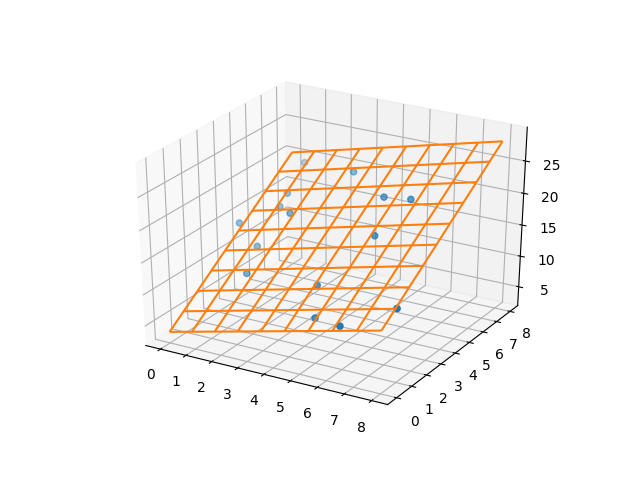

In [15]:
from mpl_toolkits.mplot3d import Axes3D

file_path = "dataset_4.csv"

dataset = np.genfromtxt(file_path, delimiter=",")
x = dataset[:, 0]
y = dataset[:, 1]
z = dataset[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

coords = np.linspace(0, 8, 10)
x, y = np.meshgrid(coords, coords)
z = res.x[0] * x + res.x[1] * y + res.x[2]

ax.plot_wireframe(x, y, z, color='C1')

#### 15. Трёхмерный график с проекцией
Построить трёхмерный график функции 2-х переменных, принимающей множество значений $z$ в некотором диапазоне. Построить цветную проекцию данной функции на плоскость $xy$.

<IPython.core.display.Javascript object>


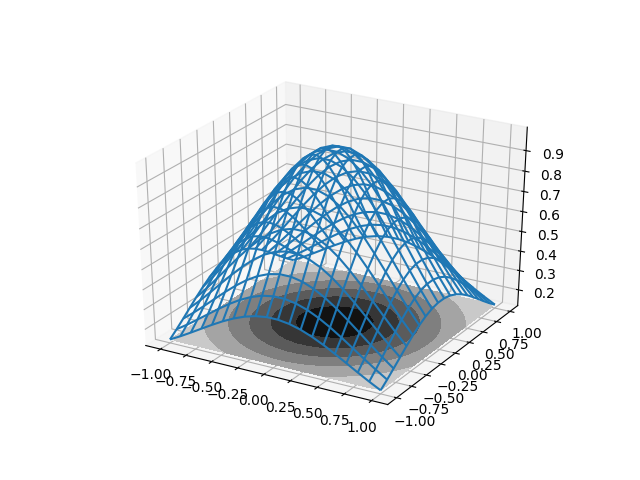

In [16]:
from matplotlib import cm

x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
xx, yy = np.meshgrid(x, y)
zz = np.exp(-(xx ** 2 + yy ** 2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, zz)
ax.contourf(xx, yy, zz, offset=np.min(zz), cmap=cm.gray_r)

#### 16. Максимальным расстоянием между точками
Даны множества $A$ и $B$ точек $(x, y)$. Найти пару точек $p_1 \in A$, $p_2 \in B$, с максимальным расстоянием между ними.

<IPython.core.display.Javascript object>


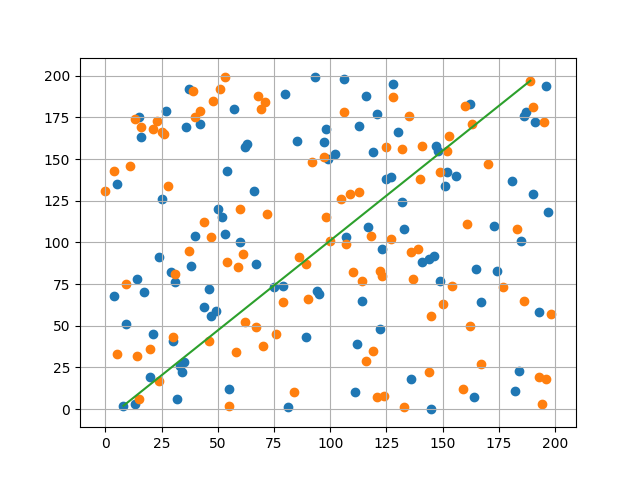

In [17]:
from scipy.spatial import distance

n = 100

a = np.random.permutation(n * 2).reshape(n, 2)
b = np.random.permutation(n * 2).reshape(n, 2)

res = np.unravel_index(np.argmax(distance.cdist(a, b, 'euclidean'), axis=None), (n, n))

f = a[res[0]]
s = b[res[1]]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a[:, 0], a[:, 1])
ax.scatter(b[:, 0], b[:, 1])
ax.plot([f[0], s[0]], [f[1], s[1]], color="C2")
ax.grid(True)